##More data explorations with Pandas

In [2]:
import pandas as pd

In [3]:
#Read-in data from the URL

In [4]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [5]:
movies.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [7]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [8]:
#Describe the movies duration with respect to genre

In [10]:
movies['duration'].groupby(movies['genre']).mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [12]:
#Simple plot for the above description

In [13]:
%matplotlib inline

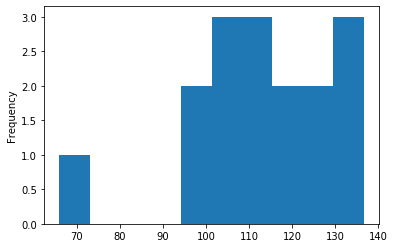

In [15]:
movies['duration'].groupby(movies['genre']).mean().plot(kind = 'hist')

In [ ]:
#Create a function to compute string length ('Actors list may be significant')
#to the movies duration

In [35]:
def strlength(a):
    x =[]
    for i in a:
        x.append(len(i))
    return x
        

In [ ]:
#Compute a new column named strlength to contain length of each string wrt
#actor's list column

In [36]:
movies['strlength'] = strlength(movies['actors_list'])

In [37]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,strlength
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",50
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",47
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",51
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",54
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",56


In [38]:
#Summarize the genre information with respect to strlength

In [39]:
movies['strlength'].groupby(movies['genre']).mean()

genre
Action       53.904412
Adventure    53.533333
Animation    54.838710
Biography    55.792208
Comedy       54.512821
Crime        55.080645
Drama        55.669065
Family       52.500000
Fantasy      54.000000
Film-Noir    52.666667
History      66.000000
Horror       54.724138
Mystery      55.500000
Sci-Fi       52.200000
Thriller     52.600000
Western      55.111111
Name: strlength, dtype: float64

In [40]:
#Sort the movies with respect to strlength

In [52]:
movies.sort_values('strlength',ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list,strlength
715,7.6,Man Bites Dog,NC-17,Comedy,95,"[u'Beno\xeet Poelvoorde', u'Jacqueline Poelvoo...",79
838,7.5,The Class,PG-13,Drama,128,"[u'Fran\xe7ois B\xe9gaudeau', u'Agame Malembo-...",76
589,7.7,The Machinist,R,Drama,101,"[u'Christian Bale', u'Jennifer Jason Leigh', u...",75
439,7.9,The Chorus,PG-13,Drama,97,"[u'G\xe9rard Jugnot', u'Fran\xe7ois Berl\xe9an...",75
695,7.7,Y Tu Mama Tambien,R,Drama,106,"[u'Maribel Verd\xfa', u'Gael Garc\xeda Bernal'...",75
...,...,...,...,...,...,...,...
610,7.7,Enter the Dragon,R,Action,102,"[u'Bruce Lee', u'John Saxon', u'Jim Kelly']",43
60,8.5,3 Idiots,PG-13,Comedy,170,"[u'Aamir Khan', u'Madhavan', u'Mona Singh']",43
552,7.8,Kung Fu Hustle,R,Action,99,"[u'Stephen Chow', u'Wah Yuen', u'Qiu Yuen']",43
852,7.5,Gallipoli,PG,Adventure,110,"[u'Mel Gibson', u'Mark Lee', u'Bill Kerr']",42


In [56]:
movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [57]:
#Simple plot for movies type

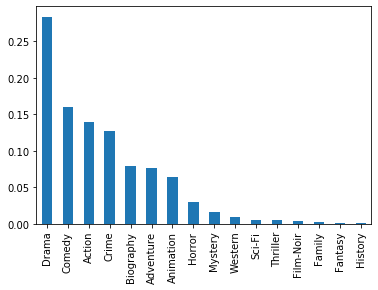

In [58]:
movies['genre'].value_counts(normalize = True).plot(kind = 'bar')

In [59]:
#A simple table for movie's tpye wrt ratings

In [61]:
pd.crosstab(movies['genre'],movies['content_rating'])

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
#Summary plot for the movies wrt to the ratings

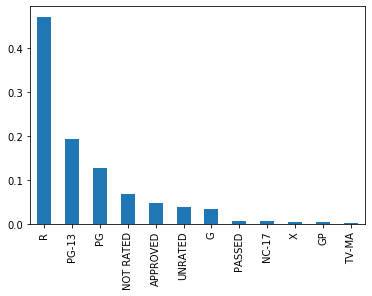

In [64]:
movies['content_rating'].value_counts(normalize = True).plot(kind = 'bar')

In [65]:
#Sammary stats for the mpovies duratiions

In [66]:
movies['duration'].agg(['count','mean','min','max'])

count    979.000000
mean     120.979571
min       64.000000
max      242.000000
Name: duration, dtype: float64

In [68]:
#Check the distribution of movie's duration

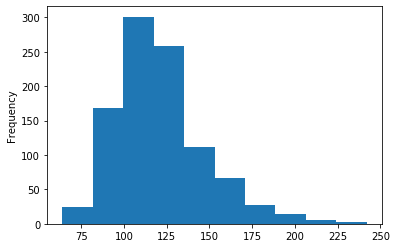

In [67]:
movies['duration'].plot(kind = 'hist')

In [69]:
#Check out the distribution of strlength

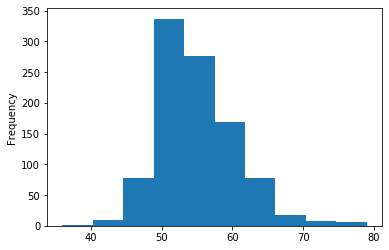

In [71]:
movies.strlength.plot(kind = 'hist')

In [73]:
#Index the movies by genre.

In [75]:
movies.set_index('genre')

,star_rating,title,content_rating,duration,actors_list,strlength
genre,,,,,,
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",50
Crime,9.2,The Godfather,R,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",47
Crime,9.1,The Godfather: Part II,R,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",51
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",54
Crime,8.9,Pulp Fiction,R,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",56
...,...,...,...,...,...,...
Comedy,7.4,Tootsie,PG,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",51
Adventure,7.4,Back to the Future Part III,PG,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",62
Action,7.4,Master and Commander: The Far Side of the World,PG-13,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",50


In [76]:
movies.reset_index()

,index,star_rating,title,content_rating,genre,duration,actors_list,strlength
0,0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",50
1,1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",47
2,2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",51
3,3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",54
4,4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",56
...,...,...,...,...,...,...,...,...
974,974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",51
975,975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",62
976,976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",50
977,977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",61


In [79]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,strlength
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",50
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",47
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",51
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",54
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",56


In [80]:
#Investigate the length of the title('This may be usefull feature
#engineering incase of machine learning model')

In [81]:
def fn1(c):
    lis =[]
    for i in c:
        lis.append(len(i))
    return lis

In [82]:
movies['title_length'] = fn1(movies['title'])

In [83]:
movies.head(5)

,star_rating,title,content_rating,genre,duration,actors_list,strlength,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",50,24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",47,13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",51,22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",54,15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",56,12


In [84]:
#The distribution of the movies title length

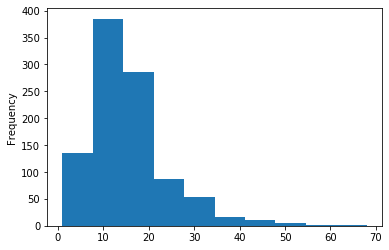

In [85]:
movies['title_length'].plot(kind = 'hist')

In [ ]:
#Describe the data and summarize by genre.

In [88]:
movies.groupby('genre').agg(['count','mean','min','max'])

star_rating                     duration                        \
                count      mean  min  max    count        mean  min  max   
genre                                                                      
Action            136  7.884559  7.4  9.0      136  126.485294   80  205   
Adventure          75  7.933333  7.4  8.9       75  134.840000   89  224   
Animation          62  7.914516  7.4  8.6       62   96.596774   75  134   
Biography          77  7.862338  7.4  8.9       77  131.844156   85  202   
Comedy            156  7.822436  7.4  8.6      156  107.602564   68  187   
Crime             124  7.916935  7.4  9.3      124  122.298387   67  229   
Drama             278  7.902518  7.4  8.9      278  126.539568   64  242   
Family              2  7.850000  7.8  7.9        2  107.500000  100  115   
Fantasy             1  7.700000  7.7  7.7        1  112.000000  112  112   
Film-Noir           3  8.033333  7.7  8.3        3   97.333333   88  111   
History             1  8.000000  8.0  8.0        1   66.000000   66   66   
Horror             29  7.806897  7.4  8.6       29  102.517241   70  146   
Mystery            16  7.975000  7.4  8.6       16  115.625000   69  160   
Sci-Fi              5  7.920000  7.7  8.2        5  109.000000   91  132   
Thriller            5  7.680000  7.5  8.0        5  114.200000  107  120   
Western             9  8.255556  7.6  8.9        9  136.666667   85  175   

          strlength                    title_length                     
              count       mean min max        count       mean min max  
genre                                                                   
Action          136  53.904412  36  68          136  16.661765   2  47  
Adventure        75  53.533333  42  69           75  20.133333   4  54  
Animation        62  54.838710  44  67           62  15.241935   2  34  
Biography        77  55.792208  46  73           77  14.103896   2  58  
Comedy          156  54.512821  43  79          156  15.820513   4  68  
Crime           124  55.080645  46  72          124  14.588710   1  32  
Drama           278  55.669065  43  76          278  14.474820   2  46  
Family            2  52.500000  52  53            2  30.500000  26  35  
Fantasy           1  54.000000  54  54            1  25.000000  25  25  
Film-Noir         3  52.666667  51  56            3   9.333333   5  13  
History           1  66.000000  66  66            1  19.000000  19  19  
Horror           29  54.724138  48  66           29  13.896552   3  50  
Mystery          16  55.500000  50  61           16  12.562500   6  24  
Sci-Fi            5  52.200000  50  54            5  14.800000   6  29  
Thriller          5  52.600000  48  56            5  14.400000   6  25  
Western           9  55.111111  48  63            9  18.333333   9  30